In [3]:
import pandas as pd #importing pandas for data analysis  
import numpy as np  #importing numpy to deal with arrays 
from matplotlib import pyplot as plt #matplot for data visualization
from sklearn.cluster import KMeans #importing kmeans from sklearn.cluster for kmeans clustering 
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc #importing scipy for hierarchy clustering

In [4]:
df = pd.read_excel(r"C:\Users\ziadg\Desktop\Online Retail.xlsx") # input the excel file by file location 
# r to flip \-->/
df.head(10) # data overview

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Expected output:  
 1- data should consist of 541909 rows with 8 attributes:
   - 4 strings
   - 1 integer
   - 2 floats
   - 1 datetime (data type in Numpy representing dates and times)  
2- There are missing data

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #splitting InvoiceDate 
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['time'] = df['InvoiceDate'].dt.time 
df.drop(['InvoiceDate'], axis=1 , inplace=True) # drop InvoiceDate column 
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,9,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,12:50:00


In [7]:
df.isna().apply(pd.value_counts) 

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,time
False,541909.0,541909.0,540455,541909.0,541909.0,406829,541909.0,541909.0,541909.0,541909.0,541909.0
True,NaN,NaN,1454,NaN,NaN,135080,NaN,NaN,NaN,NaN,NaN


1-(1454) missing values in the Description column.  
2-(135080) missing values in the CustomerID column.

In [8]:
df['Description'].fillna('unknown_product',inplace=True) #fill the missing value by unknown 

In [11]:
df['CustomerID'].fillna(method='ffill', inplace=True)# forward filling  the missing data
df['CustomerID'].value_counts() #its not a string values 

17841.0    8644
14911.0    7648
12748.0    6134
14096.0    5412
14606.0    3952
           ... 
15753.0       1
14424.0       1
15562.0       1
13302.0       1
17331.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [12]:
df['Total_Cost']=df['Quantity']*df['UnitPrice'] # calulate the total price that made by the customers 
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,time,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,9,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,12:50:00,16.60


In [13]:
df['Description'].nunique() # no of unique products 

4224

In [14]:
df['Description'].drop_duplicates() # drop the duplicate products 
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,time,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,9,12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,12:50:00,16.60


In [17]:
def convert (value): # function to convert the string values into numerical values so that i can select it as feature
    try:              # i used try and except here to protect the program from any error that might occurs
        numeric_value = pd.to_numeric(value)
        return numeric_value  
    except:
        return None
df['NumericInvoiceNo'] = df['InvoiceNo'].apply(convert)
df['NumericInvoiceNo'] = df['NumericInvoiceNo'].ffill() 
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,time,Total_Cost,NumericInvoiceNo
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,08:26:00,15.30,536365.0
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34,536365.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,08:26:00,22.00,536365.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34,536365.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,08:26:00,20.34,536365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,9,12:50:00,10.20,581587.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,12:50:00,12.60,581587.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,12:50:00,16.60,581587.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,12:50:00,16.60,581587.0


In [16]:
df.columns 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'year', 'month', 'day', 'time', 'Total_Cost',
       'NumericInvoiceNo'],
      dtype='object')

C:\Users\ziadg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ziadg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ziadg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ziadg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

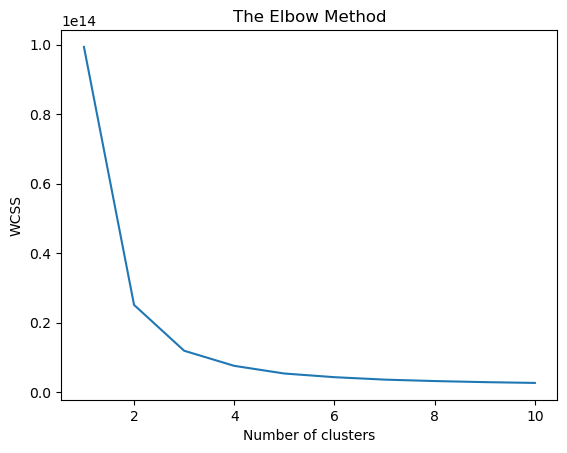

In [18]:
x = df.iloc[:, [12,5,11]].values # selecting the features for kmeans algoritm by columns index 
                           # .values returns the data into numpy arrays 
init = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) # creating kmeans cluster with intitial value = 1 
    kmeans.fit(x) # .fit input the selected features 
    init.append(kmeans.inertia_) # calc and append the sum of squre distance in the clusters 
plt.plot(range(1, 11), init)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0) # from the elbow graph there is 3 clusters 2,3,5 
y_kmeans = kmeans.fit_predict(x) 

C:\Users\ziadg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\ziadg\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


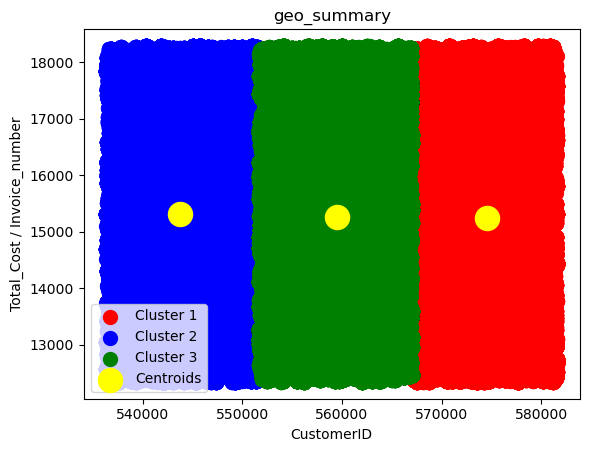

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow'
            , label = 'Centroids')
plt.title('geo_summary')
plt.xlabel('CustomerID')
plt.ylabel('Total_Cost / Invoice_number')
plt.legend()
plt.show()

MemoryError: Unable to allocate 1.07 TiB for an array with shape (146832411186,) and data type float64

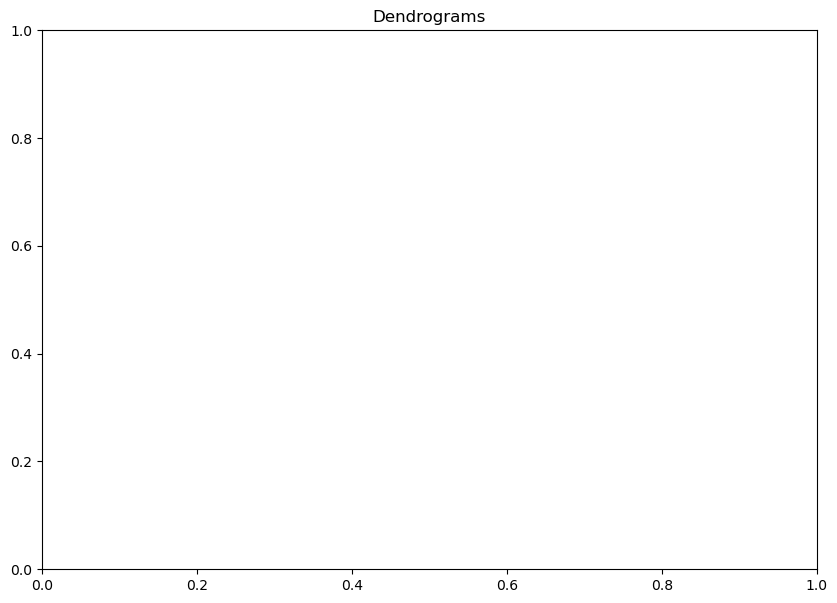

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendo = shc.dendrogram(shc.linkage(x, method='ward'))# Perform hierarchical clustering using 'ward' linkage method 
plt.axhline(y=6, color='r', linestyle='--') 

In [ ]:
hier = AgglomerativeClustering(n_clusters=3) # Apply Agglomerative Clustering with 3 clusters
y_pred2 = hier.fit_predict(x)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

### note that i tried many times to solve this error but failed due to ram memory size also the same error happend in google colab and online jupyter 

### keep in mind that i still didnot study visualization so i dont want to copy paste the visualization from any online sorce 